In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [12]:
data = pd.read_csv("2017_jun_final.csv")
data.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [7]:
print(data.shape)

(8704, 25)


In [8]:
print(data.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [9]:
data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [14]:
cols = data.loc[:, data.isnull().any()].copy().columns.tolist()
cols.remove('Язык.программирования')
print(cols)

new_data = data.drop(cols, axis=1)
print(new_data.shape)
print(new_data.isnull().sum().to_frame('nulls'))

['Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls']
(8704, 20)
                                  nulls
N                                     0
Должность                             0
Язык.программирования              3850
Общий.опыт.работы                     0
Опыт.работы.на.текущем.месте          0
Зарплата.в.месяц                      0
Изменение.зарплаты.за.12.месяцев      0
Город                                 0
Размер.компании                       0
Тип.компании                          0
Пол                                   0
Возраст                               0
Образование                           0
Еще.студент                           0
Уровень.английского                   0
Дата.заполнения                       0
User.Agent                            0
exp                                   0
current_job_exp                       0
salary                                0


In [15]:
new_data = new_data.dropna()

In [16]:
new_data.shape

(4854, 20)

In [24]:
python_data = new_data[new_data['Язык.программирования'].eq('Python')]

In [20]:
python_data.shape

(207, 20)

In [21]:
python_data = python_data.groupby('Должность')

In [23]:
python_data['Зарплата.в.месяц'].agg(['min', 'max'])

,min,max
Должность,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


In [25]:
def fill_avg_salary(row):
    gd = python_data[python_data['Должность'].eq(row['Должность'])].groupby('Должность')
    avg = gd['Зарплата.в.месяц'].agg('mean').round(2).tolist()[0]
    return avg

In [28]:
python_data.loc[:, 'avg'] = python_data.apply(fill_avg_salary, axis=1)
python_data.head(3)

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,avg
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,...,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,1799.07
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,1799.07
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,...,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,560.84


In [30]:
statistics = python_data['avg'].describe()
print(statistics)

count     207.000000
mean     1753.937343
std       996.563935
min       560.840000
25%       560.840000
50%      1799.070000
75%      1799.070000
max      4000.000000
Name: avg, dtype: float64


In [31]:
statistics.to_csv("statistics.csv")

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

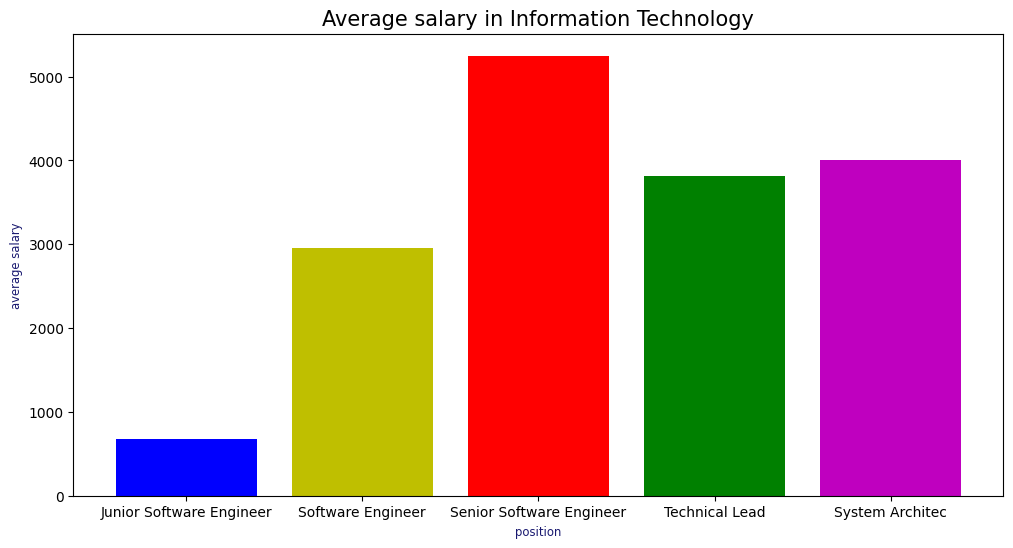

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(
    ["Junior Software Engineer", "Software Engineer", "Senior Software Engineer",
     "Technical Lead", "System Architec"],
    [675.0, 2950.0, 5250.0, 3812.5, 4000.0],
    color=["b", "y", "r", "g", "m"],
)
plt.xlabel("position", fontsize="small", color="midnightblue")
plt.ylabel("average salary", fontsize="small", color="midnightblue")
plt.title("Average salary in Information Technology", fontsize=15)
plt.show()

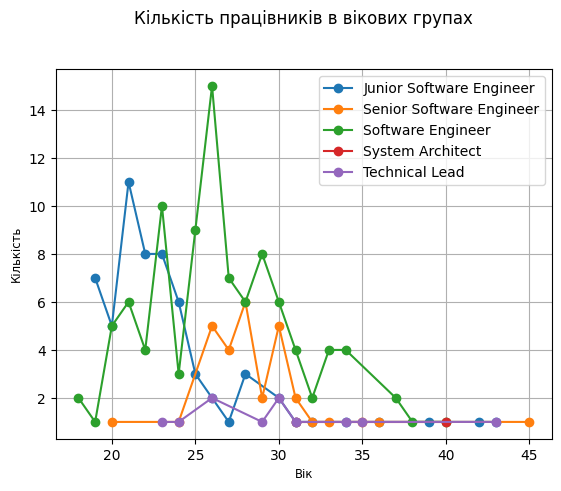

In [36]:
gd = python_data[['Должность', 'Возраст']].groupby('Должность')
fig, axs = plt.subplots()
for key, values in gd:
    d = values.groupby('Возраст').size()
    axs.plot(d.index.values, d.values, marker='o', label=key)

plt.title('Кількість працівників в вікових групах', y=1.1)
plt.xlabel('Вік', fontsize='small')
plt.ylabel('Кількість', fontsize='small')
plt.legend()
plt.grid()
plt.show()

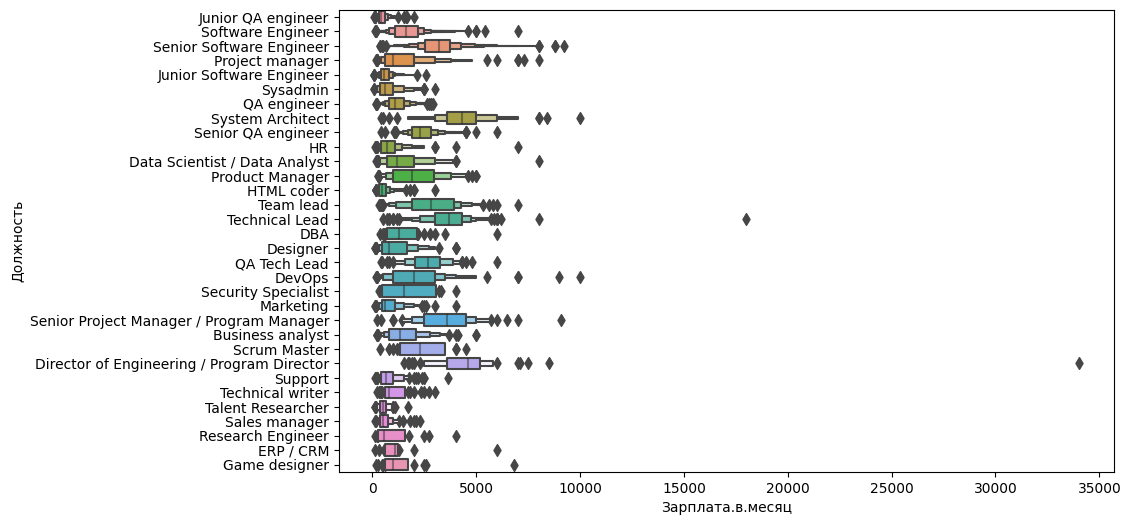

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(x="Зарплата.в.месяц", y="Должность", data=data)
plt.show()